C:\Users\User\AppData\Local\Temp\ipykernel_488\36020843.py:88: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.ax.set_yticklabels(cbar.ax.get_yticklabels(), weight='normal')


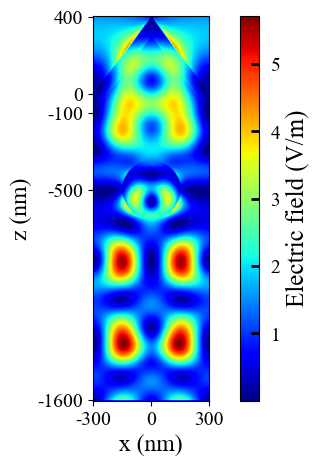

wavelength: 1035 nm


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cbook as cbook
from matplotlib import cm
import numpy as np
import matplotlib.pyplot as plt
import h5py

plt.rcParams['font.family'] = 'Times New Roman'

# Load MATLAB data file
mat_file = h5py.File('efield_data_bare.mat')

# Save data into different variables
field = mat_file['field'][:]
field_intensity = mat_file['field_intensity'][:]
x = mat_file['x'][:]
z = mat_file['z'][:]

# Take transpose of the data
field = field.T
field_intensity = field_intensity.T
x = x.T
z = z.T

x = x[slice(None),0]
z = z[slice(None),0]

x = x*1e9
z = z*1e9

# Specify the indices or ranges for each dimension
a_indices = slice(None)  # Use a specific index or slice(None) for all elements along the first dimension
b_indices = 0           # Use a specific index for the second dimension
c_indices = slice(None)  # Use a specific index or slice(None) for all elements along the third dimension
for i in range(400, 1100):   # i is the wavelength range for which you want to generate intensity plot
    d_indices = i-400  # 400 is the lowest wavelength point of the range (400-1100 nm)

    # Use the specified indices to extract the subarray
    subarray = field[a_indices, b_indices, c_indices, d_indices]

    subarray = subarray.T

    # Create a figure and an axis object
    fig, ax = plt.subplots(figsize=(8, 5))

    # Create a color plot
    cax = ax.imshow(subarray, cmap='jet', origin='lower')

    # Add a color bar
    cbar = fig.colorbar(cax)

    # Set color bar label
    cbar.set_label('Electric field (V/m)', rotation=90, fontsize=18, fontweight='normal')

    # Set x-axis and y-axis labels
    ax.set_xlabel('x (nm)', fontsize=17, fontweight='normal')
    ax.set_ylabel('z (nm)', fontsize=17, fontweight='normal')

    # Set x-axis and y-axis tick labels with round figures
    x_tick_positions = [0, len(x) // 2, len(x) - 1]
    z_tick_positions = [0, len(z) // 2, len(z) - 1]

    # Round x and z tick labels to integers
    x_tick_labels = [int(x[i]) for i in x_tick_positions]
    # z_tick_labels = [int(z[i]) for i in z_tick_positions]

    ax.set_xticks(x_tick_positions)
    ax.set_xticklabels(x_tick_labels, fontsize=14, fontweight='normal')


    # Set color bar tick parameters
    cbar.ax.tick_params(labelsize=14, width=2, length=6, direction='in', pad=8, which='both', labelright=True)
    cbar.ax.set_yticklabels(cbar.ax.get_yticklabels(), weight='normal')

    # Define the desired z-axis tick values
    desired_z_ticks = [400, 0, -100, -500, -1600]  # You can add more values here as needed

    # Automatically find the nearest positions in z for each desired tick value
    z_tick_positions = [np.abs(z - tick).argmin() for tick in desired_z_ticks]
    z_tick_labels = desired_z_ticks  # Use the same values as labels

    # Set ticks and labels on the z-axis
    ax.set_yticks(z_tick_positions)
    ax.set_yticklabels(z_tick_labels, fontsize=14, fontweight='normal')

    # plt.savefig('stnp_1035nm.pdf', format='pdf', dpi=600, bbox_inches='tight')

    # Show the plot
    plt.show()
    print(f'wavelength: {i} nm')
